<a href="https://colab.research.google.com/github/veyselberk88/Data-Science-Tools-and-Ecosystem/blob/main/lec08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="./ccsf.png" alt="CCSF Logo" width=200px style="margin:0px -5px">

# Lecture 08: Census

Associated Textbook Sections: [6.3, 6.4, 7.0](https://ccsf-math-108.github.io/textbook/chapters/06/3/Example_Population_Trends.html)

---

## Overview

* [Exploring Census Data](#Exploring-Census-Data)
* [Visualizing Trends](#Visualizing-Trends)

---

## Set Up the Notebook

In [ ]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

---

## Exploring Census Data

---

### The Decennial Census

* Every ten years, the Census Bureau counts how many people there are in the U.S.
* In between censuses, the Bureau estimates how many people there are each year.
* Article 1, Section 2 of the Constitution:
> "Representatives and direct Taxes shall be apportioned among the several States ... according to their respective Numbers ..."


---

### Census Table Description

* Values have column-dependent interpretations
    * The `SEX` column: `1` is Male, `2` is Female
    * The `POPESTIMATE2010` column: 7/1/2010 estimate
* In this table, some rows are sums of other rows
    * The `SEX` column: `0` is Total (of Male + Female)
    * The `AGE` column: `999` is Total of all ages
* Numeric codes are often used for storage efficiency
    * Values in a column have the same type, but are not necessarily comparable (`AGE 12` vs `AGE 999`)

---

### Demo: Census

Explore the US Census data in `census.csv` from the [Annual Estimates of the Resident Population by Single Year of Age and Sex for the United States](https://www2.census.gov/programs-surveys/popest/technical-documentation/file-layouts/2010-2020/cc-est2020-agesex.pdf).

(Release date: June 2021, Updated January 2022 to include April 1, 2020 estimates)

In [ ]:
census = Table.read_table('census.csv')
census

SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019,POPESTIMATE2020
0,0,3944153,3944160,3951495,3963264,3926731,3931411,3954973,3984144,3963268,3882437,3826908,3762227,3735010
0,1,3978070,3978090,3957904,3966768,3978210,3943348,3949559,3973828,4003586,3981864,3897917,3842257,3773884
0,2,4096929,4096939,4090799,3971498,3980139,3993047,3960015,3967672,3992657,4021261,3996742,3911822,3853025
0,3,4119040,4119051,4111869,4102429,3983007,3992839,4007852,3976277,3984985,4009060,4035053,4009037,3921526
0,4,4063170,4063186,4077511,4122252,4112849,3994539,4006407,4022785,3992241,4000394,4021907,4045996,4017847
0,5,4056858,4056872,4064653,4087770,4132349,4123745,4007123,4020489,4038022,4007233,4012789,4032231,4054336
0,6,4066381,4066412,4073031,4075153,4097860,4142923,4135738,4020428,4034969,4052428,4019106,4022432,4040169
0,7,4030579,4030594,4043100,4083399,4085255,4108453,4154947,4148711,4034355,4048430,4063647,4027876,4029753
0,8,4046486,4046497,4025624,4053313,4093553,4096033,4120476,4167765,4162142,4047130,4059209,4071894,4034785
0,9,4148353,4148369,4125413,4035854,4063662,4104437,4107986,4133426,4181069,4175085,4058207,4067320,4078668


---

Clean up the table by completing the following:
1. Select the `SEX`, `AGE`, `CENSUS2010POP`, and `POPESTIMATE2019` columns.
2. Relabel the 2010 and 2019 columns.
3. Remove the 999 ages and focus just on the combined data where the `SEX` value is 0. Drop the `SEX` column since there is only one value there.

In [ ]:
census_reduced = census.select('SEX', 'AGE', 'CENSUS2010POP', 'POPESTIMATE2019')
census_reduced

SEX,AGE,CENSUS2010POP,POPESTIMATE2019
0,0,3944153,3762227
0,1,3978070,3842257
0,2,4096929,3911822
0,3,4119040,4009037
0,4,4063170,4045996
0,5,4056858,4032231
0,6,4066381,4022432
0,7,4030579,4027876
0,8,4046486,4071894
0,9,4148353,4067320


In [ ]:
census_relabeled = census_reduced.relabeled(2, '2010').relabeled(3, '2019')
census_relabeled

SEX,AGE,2010,2019
0,0,3944153,3762227
0,1,3978070,3842257
0,2,4096929,3911822
0,3,4119040,4009037
0,4,4063170,4045996
0,5,4056858,4032231
0,6,4066381,4022432
0,7,4030579,4027876
0,8,4046486,4071894
0,9,4148353,4067320


In [ ]:
census_no_999 = census_relabeled.where('AGE', are.below(999))
census_no_999

SEX,AGE,2010,2019
0,0,3944153,3762227
0,1,3978070,3842257
0,2,4096929,3911822
0,3,4119040,4009037
0,4,4063170,4045996
0,5,4056858,4032231
0,6,4066381,4022432
0,7,4030579,4027876
0,8,4046486,4071894
0,9,4148353,4067320


In [ ]:
everyone = census_no_999.where('SEX', 0)
everyone

SEX,AGE,2010,2019
0,0,3944153,3762227
0,1,3978070,3842257
0,2,4096929,3911822
0,3,4119040,4009037
0,4,4063170,4045996
0,5,4056858,4032231
0,6,4066381,4022432
0,7,4030579,4027876
0,8,4046486,4071894
0,9,4148353,4067320


In [ ]:
everyone = everyone.drop('SEX')
everyone

AGE,2010,2019
0,3944153,3762227
1,3978070,3842257
2,4096929,3911822
3,4119040,4009037
4,4063170,4045996
5,4056858,4032231
6,4066381,4022432
7,4030579,4027876
8,4046486,4071894
9,4148353,4067320


---

## Visualizing Trends

---

### Visualizing Numerical Trends

<img src="./Dwiggins_graph.jpg" alt="Published in 1919, Dwiggins used this parody graph to express his opinion of standards in printing" width=300px>

* You will soon learn about basic data visualizations.
* For example, what is a fundamental way to visualize how population sizes change over the range of ages?
* In this case, the fundamental visualization is a line plot.

---

### Demo: Line Plots

Visualize the relationship between age and population size in 2010.

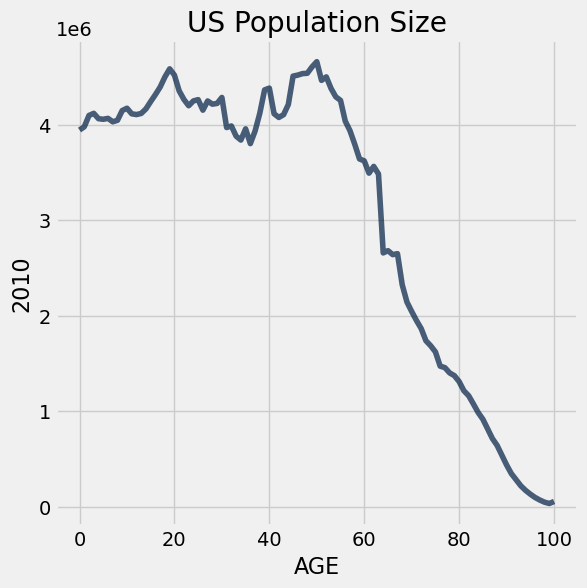

In [ ]:
everyone.plot('AGE','2010')

# Some extra graph formatting you are not responsible for
plt.title('US Population Size')
plt.show()

---

Include lines for both 2010 and the estimated 2019 population sizes.

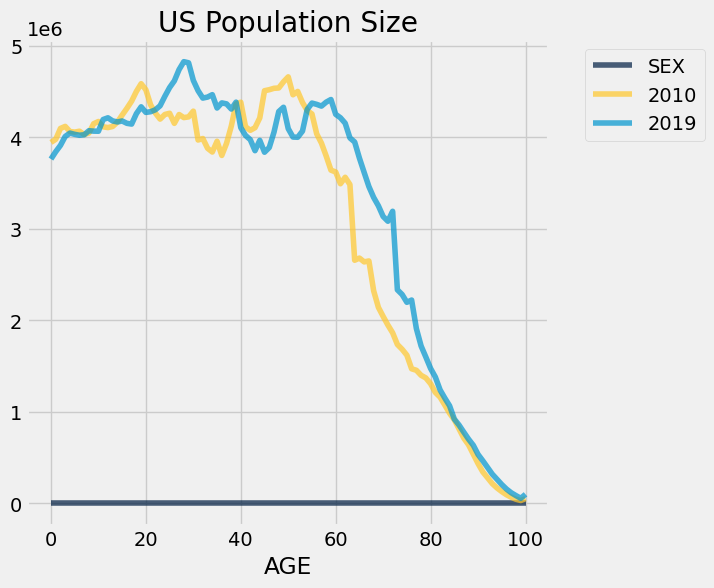

In [ ]:
everyone.plot('AGE')

# Some extra graph formatting you are not responsible for
plt.title('US Population Size')
plt.show()

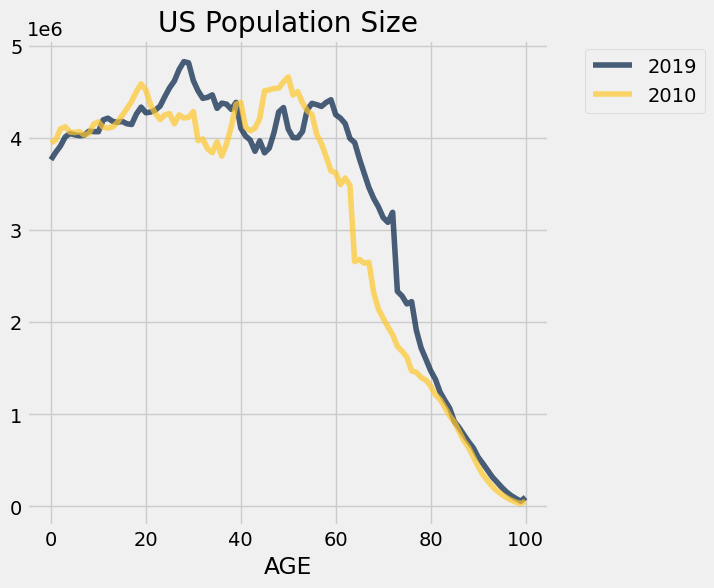

In [ ]:
everyone.plot('AGE', select=['2019', '2010'])

# Some extra graph formatting you are not responsible for
plt.title('US Population Size')
plt.show()

---

### Demo: Male and Female 2019 Estimates

Create a table with `Age`, `Males`, `Females` columns showing the population estimates in 2019 for males and females by age.

In [ ]:
census_no_999.where('SEX', 2) # females

SEX,AGE,2010,2019
2,0,1929877,1841226
2,1,1947217,1878996
2,2,2004731,1911720
2,3,2014490,1960386
2,4,1985620,1977745
2,5,1984764,1969055
2,6,1991062,1966849
2,7,1973503,1969451
2,8,1981033,1989491
2,9,2028657,1991601


In [ ]:
males = census_no_999.where('SEX',1)
males

SEX,AGE,2010,2019
1,0,2014276,1921001
1,1,2030853,1963261
1,2,2092198,2000102
1,3,2104550,2048651
1,4,2077550,2068251
1,5,2072094,2063176
1,6,2075319,2055583
1,7,2057076,2058425
1,8,2065453,2082403
1,9,2119696,2075719


In [ ]:

males = census_no_999.where('SEX', 1)
females = census_no_999.where('SEX', 2)
pop_2019 = Table().with_columns(
    'Age', males.column('AGE'),
    'Males', males.column('2019'),
    'Females', females.column('2019')
)
pop_2019

Age,Males,Females
0,1921001,1841226
1,1963261,1878996
2,2000102,1911720
3,2048651,1960386
4,2068251,1977745
5,2063176,1969055
6,2055583,1966849
7,2058425,1969451
8,2082403,1989491
9,2075719,1991601


---

Visualize the distribution of of population size for both males and females.

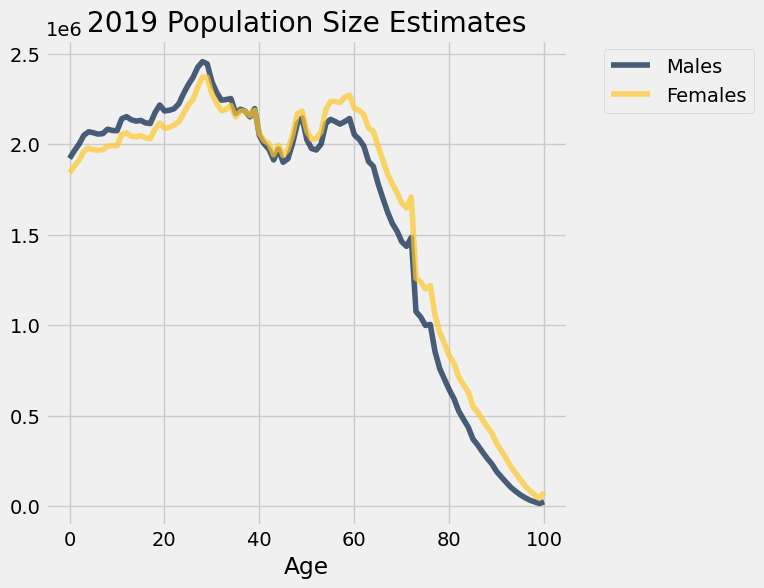

In [ ]:
pop_2019.plot('Age')


# Some extra graph formatting you are not responsible for
plt.title('2019 Population Size Estimates')
plt.show()

---

Calculate the percent female for each age

In [ ]:

total = pop_2019.column('Males') + pop_2019.column('Females')
pct_female = 100 * pop_2019.column('Females') / total
pct_female

array([ 48.93979018,  48.90344399,  48.87032181,  48.89917454,
        48.88153622,  48.83289177,  48.89701056,  48.89552211,
        48.85910586,  48.96592842,  48.98425388,  48.96313718,
        48.91848904,  48.91588355,  48.95682562,  48.99213593,
        49.00723665,  48.9917086 ,  48.94499775,  48.85555766,
        48.8800806 ,  48.89699809,  48.95129043,  48.84655675,
        48.77220901,  48.76311842,  48.68996749,  48.84567382,
        49.115004  ,  49.23311185,  49.27161137,  49.33570713,
        49.34690992,  49.39653681,  49.57328862,  49.7823678 ,
        49.88801204,  49.99258886,  50.08019625,  49.89892133,
        50.1409379 ,  50.20977831,  50.37327215,  50.36508359,
        50.27570341,  50.48253869,  50.64261911,  50.57544456,
        50.61870656,  50.44489454,  50.56911629,  50.63449931,
        50.80649435,  50.81894266,  50.89138769,  51.13627062,
        51.2696241 ,  51.37238838,  51.53410868,  51.46437873,
        51.72648051,  51.88456258,  52.09723728,  52.31

In [ ]:
pct_female = np.round(pct_female, 3)
pct_female

array([ 48.94 ,  48.903,  48.87 ,  48.899,  48.882,  48.833,  48.897,
        48.896,  48.859,  48.966,  48.984,  48.963,  48.918,  48.916,
        48.957,  48.992,  49.007,  48.992,  48.945,  48.856,  48.88 ,
        48.897,  48.951,  48.847,  48.772,  48.763,  48.69 ,  48.846,
        49.115,  49.233,  49.272,  49.336,  49.347,  49.397,  49.573,
        49.782,  49.888,  49.993,  50.08 ,  49.899,  50.141,  50.21 ,
        50.373,  50.365,  50.276,  50.483,  50.643,  50.575,  50.619,
        50.445,  50.569,  50.634,  50.806,  50.819,  50.891,  51.136,
        51.27 ,  51.372,  51.534,  51.464,  51.726,  51.885,  52.097,
        52.313,  52.443,  52.761,  52.922,  53.035,  53.265,  53.271,
        53.407,  53.442,  53.51 ,  53.951,  54.254,  54.581,  54.833,
        55.268,  55.829,  56.17 ,  56.375,  57.037,  57.645,  58.288,
        59.12 ,  59.774,  60.62 ,  61.506,  62.435,  63.429,  64.363,
        65.561,  66.595,  67.765,  69.033,  70.064,  70.778,  72.115,
        72.704,  74.

---

Add female percent to our table

In [ ]:
pop_2019 =  pop_2019.with_column('Percent female', pct_female)
pop_2019

Age,Males,Females,Percent female
0,1921001,1841226,48.94
1,1963261,1878996,48.903
2,2000102,1911720,48.87
3,2048651,1960386,48.899
4,2068251,1977745,48.882
5,2063176,1969055,48.833
6,2055583,1966849,48.897
7,2058425,1969451,48.896
8,2082403,1989491,48.859
9,2075719,1991601,48.966


---

Visualize the relationship between age and the percent of the population that is female.

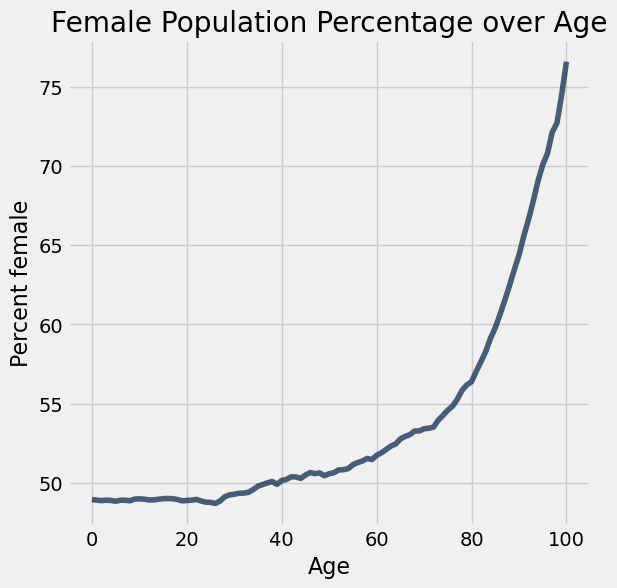

In [ ]:
pop_2019.plot('Age', 'Percent female')

# Some extra graph formatting you are not responsible for
plt.title('Female Population Percentage over Age')
plt.show()

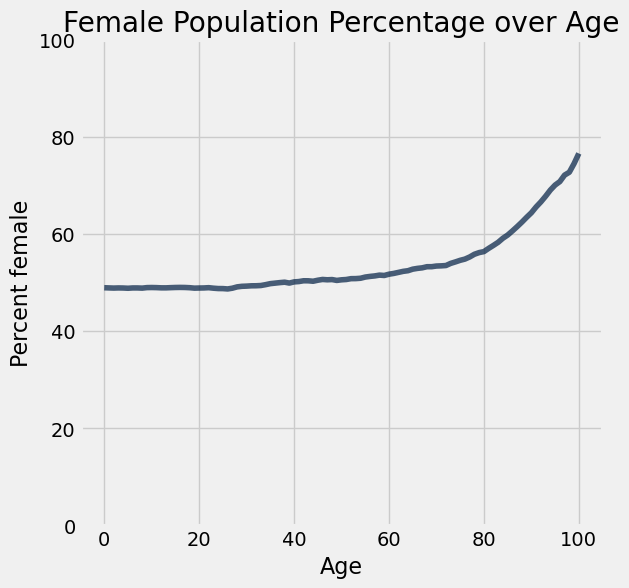

In [ ]:
pop_2019.plot('Age', 'Percent female')


# Some extra graph formatting you are not responsible for
plt.ylim(0, 100)
plt.title('Female Population Percentage over Age')
plt.show()

---

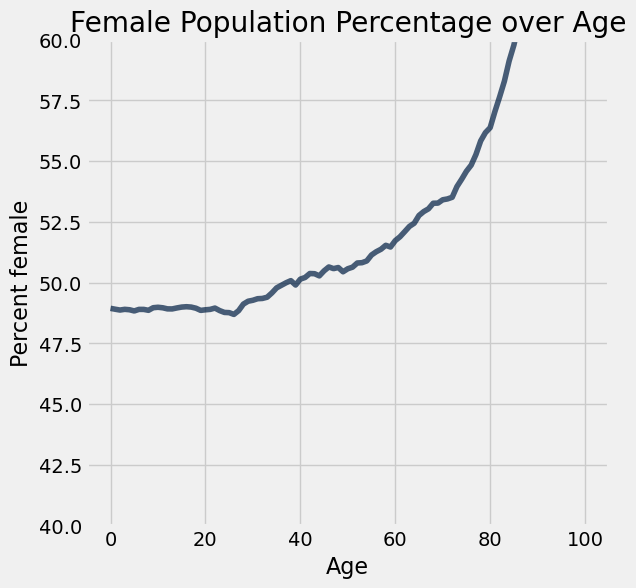

In [ ]:
pop_2019.plot('Age', 'Percent female')


# Some extra graph formatting you are not responsible for
plt.ylim(40, 60)
plt.title('Female Population Percentage over Age')
plt.show()

## Attribution

This content is licensed under the <a href="https://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License (CC BY-NC-SA 4.0)</a> and derived from the <a href="https://www.data8.org/">Data 8: The Foundations of Data Science</a> offered by the University of California, Berkeley.

<img src="./by-nc-sa.png" width=100px>